# Produce visualizations
## Group 2


In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import download
import descriptives as dcts

In [67]:
eviction = download.load_evict('../inputs/eviction_data_tract.csv')
crime = download.load_crime('../inputs/crime_by_tract.csv')
buildings = download.load_building('../inputs/building_violation_by_tract.csv')
acs = download.load_acs('../inputs/acs_year_tract.csv')
education = download.load_education('../inputs/educ_year_tract.csv')
tracts = download.load_tract('../inputs/ch_opdat/tracts.csv', True)

In [68]:
tracts = download.convert_to_geopandas(tracts, 'location')
type(tracts)

geopandas.geodataframe.GeoDataFrame

In [69]:
eviction_df = download.join_bases(eviction, acs, education, crime, buildings, tracts, True)
type(eviction_df)

geopandas.geodataframe.GeoDataFrame

In [70]:
eviction_df.columns

Index(['tract', 'commarea', 'location', 'geometry', 'filing_year',
       'eviction_filings_total', 'eviction_filings_rate',
       'eviction_filings_completed', 'case_type_single_action',
       'case_type_joint_action',
       ...
       'total_department_bureau_SIGNS_mean_by_commarea',
       'total_department_bureau_SPECIAL INSPECTION PROGRAM_mean_by_commarea',
       'total_department_bureau_SPECIAL TASK FORCE_mean_by_commarea',
       'total_department_bureau_VENTILATION_mean_by_commarea',
       'total_department_bureau_WATER_mean_by_commarea',
       'total_violation_status_COMPLIED_perc_mean_by_commarea',
       'total_violation_status_NO ENTRY_perc_mean_by_commarea',
       'total_violation_status_OPEN_perc_mean_by_commarea',
       'total_inspection_category_COMPLAINT_perc_mean_by_commarea',
       'perc_increase_bv_mean_by_commarea'],
      dtype='object', length=280)

## Maps

In [196]:
variable = "eviction_filings_rate"
start_year = 2010
end_year = 2017
years_to_map = list(range(start_year, end_year + 1))

### Plot choropleth maps for each year

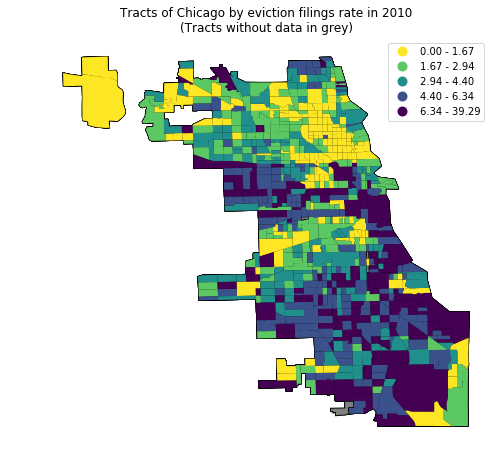

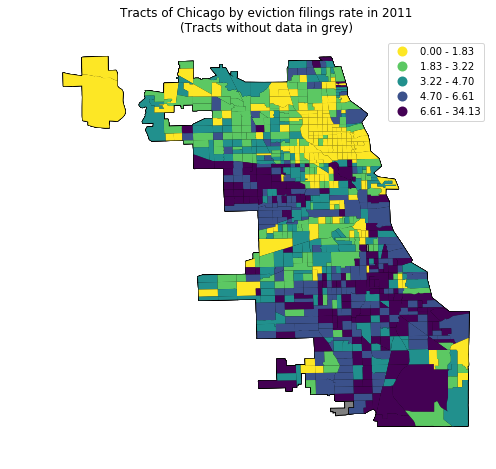

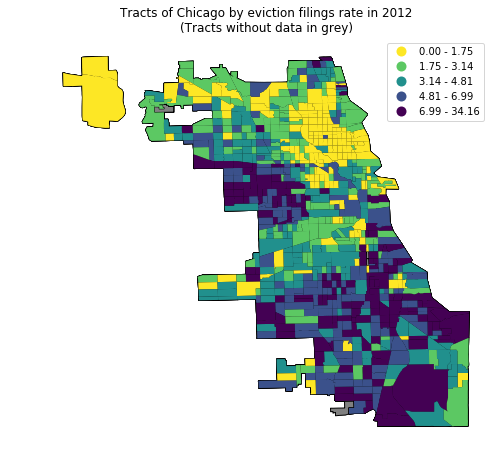

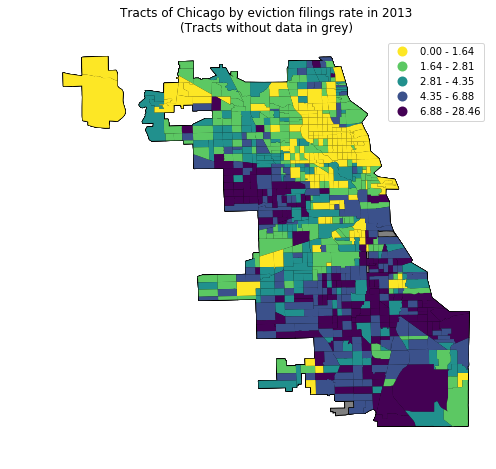

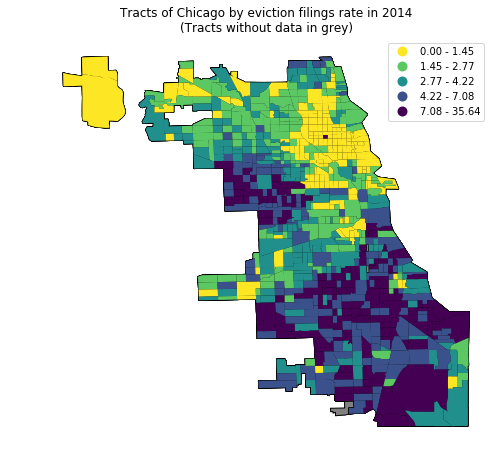

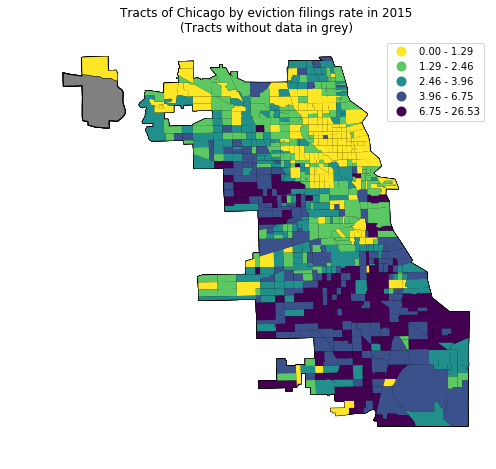

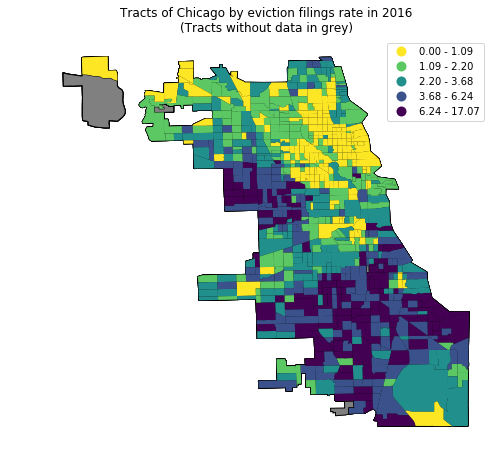

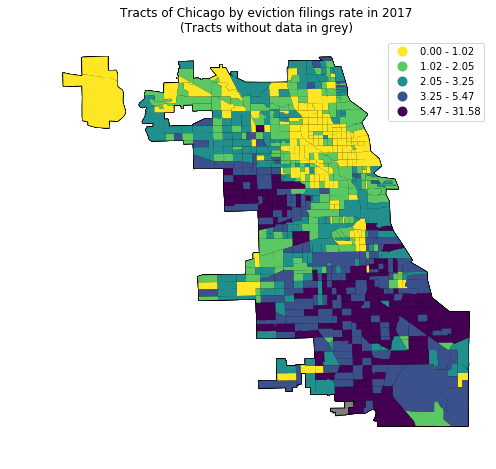

In [193]:
for year in years_to_map:
    dcts.plot_map(eviction_df, 'eviction_filings_rate', year, save_fig=True)

### Plot tracts that are in the top 10% of eviction filings each year

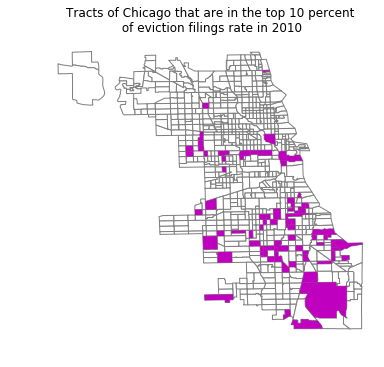

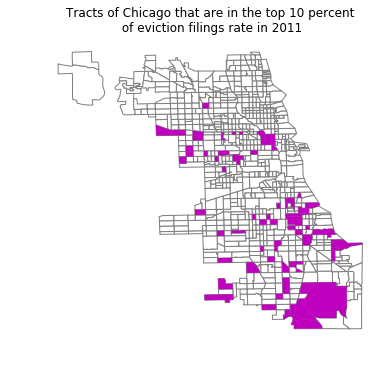

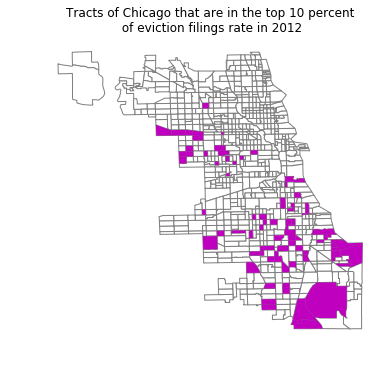

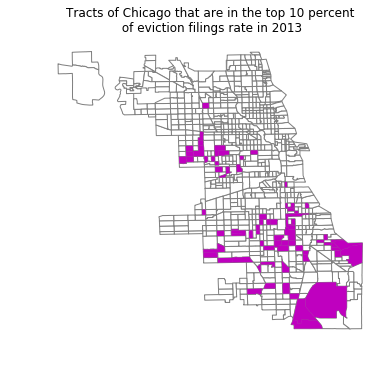

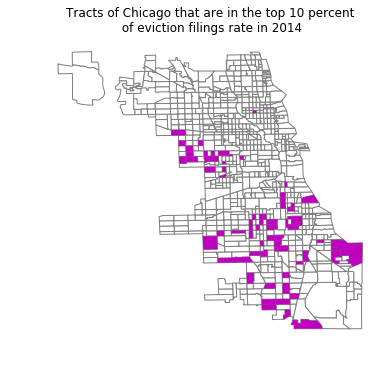

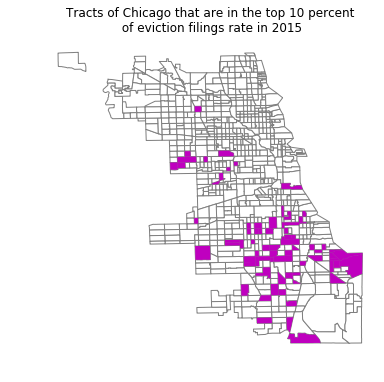

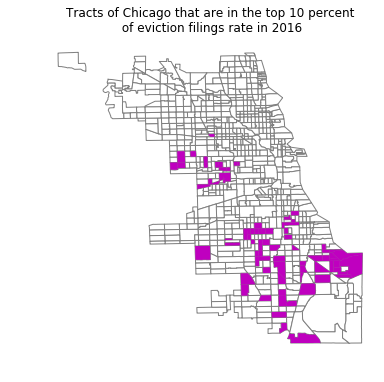

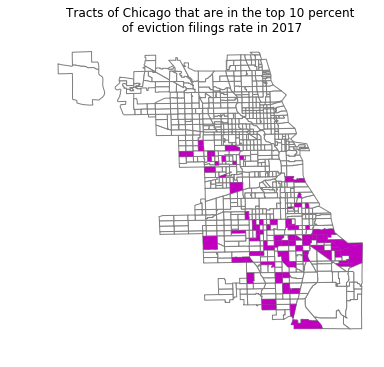

In [208]:
dcts.plot_top_10pct_tracts(eviction_df, variable, years_to_map, save_fig=True)

### Plot tracts that are in the top 10% of evict filings K times in the 2010-2017 period

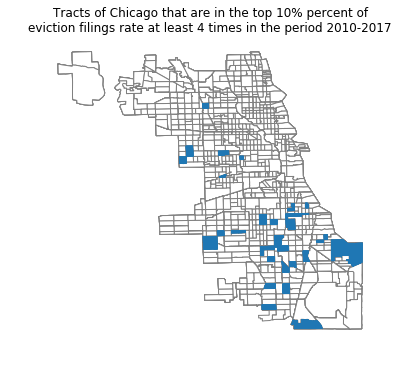

47 tracts were in the top 10% of eviction filings rate at least 4 times



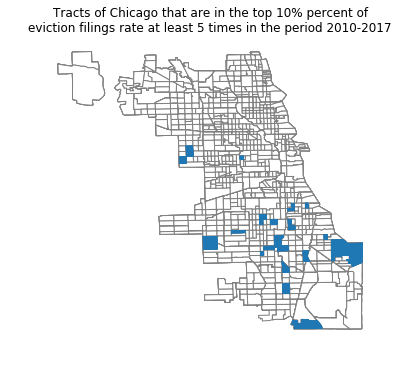

32 tracts were in the top 10% of eviction filings rate at least 5 times



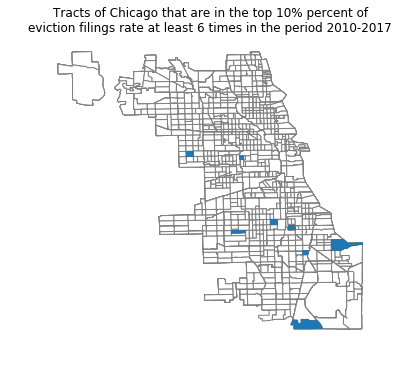

11 tracts were in the top 10% of eviction filings rate at least 6 times



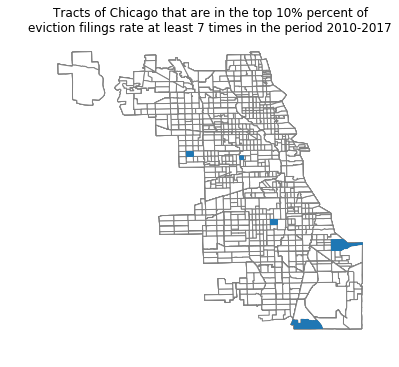

8 tracts were in the top 10% of eviction filings rate at least 7 times



In [206]:
for k in range(4, 8):
    tracts = dcts.plot_top_10pct_tracts_ktimes(eviction_df, variable, k, get_tracts=True, save_fig=True)
    print("{} tracts were in the top 10% of {} at least {} times".\
          format(len(tracts), " ".join(variable.split("_")), k))
    print()

In [164]:
ed10 = eviction_df[eviction_df.year == 2010]
ed11 = eviction_df[eviction_df.year == 2011]
ed12 = eviction_df[eviction_df.year == 2012]
ed13 = eviction_df[eviction_df.year == 2013]
ed14 = eviction_df[eviction_df.year == 2014]
ed15 = eviction_df[eviction_df.year == 2015]
ed16 = eviction_df[eviction_df.year == 2016]
ed17 = eviction_df[eviction_df.year == 2017]

Plotting eviction_filings_rate for year 2010


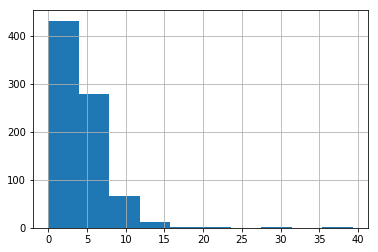

Plotting eviction_filings_rate for year 2011


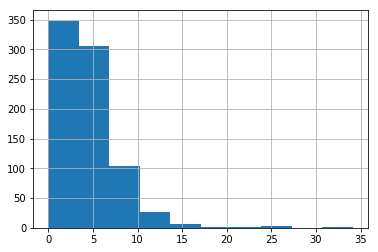

Plotting eviction_filings_rate for year 2012


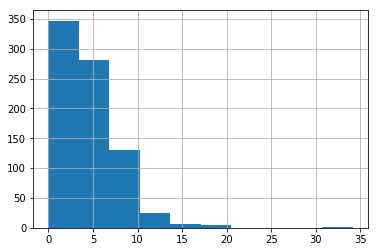

Plotting eviction_filings_rate for year 2013


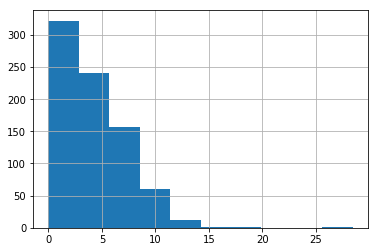

Plotting eviction_filings_rate for year 2014


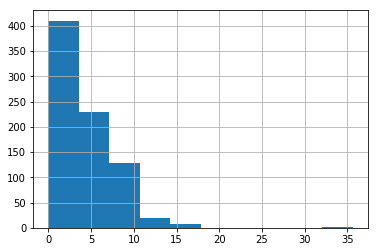

Plotting eviction_filings_rate for year 2015


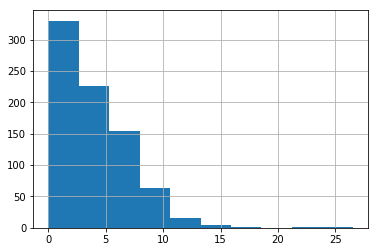

Plotting eviction_filings_rate for year 2016


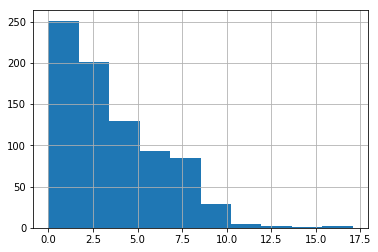

Plotting eviction_filings_rate for year 2017


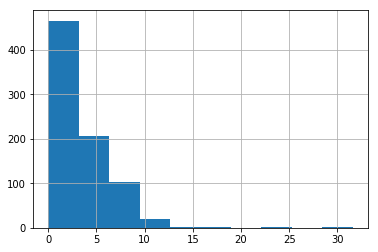

In [172]:
for year in range(2010, 2018):
    print("Plotting {} for year {}".format(variable, year))
    df = eviction_df[eviction_df.year == year]
    df[variable].hist()
    plt.show()